# Caixeiro Viajante com Simulated Annealing

# Grupo 8

## Requerimentos

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Funções Auxiliares

In [74]:
def mostra_caminho(x, y, caminho, titulo, axes, index):
    """
    Recebe dois vetores x e y representando os pontos do mapa, um vetor representando
    um caminho entre os pontos e um título para o gráfico.
    Plota um gráfico mostrando o caminho escolhido.
    """
    # plota os pontos
    axes[index].scatter(x,y)
    axes[index].set_title(titulo)
    for i in range(N-1):
        inicio = (x[caminho[i]],y[caminho[i]])
        fim = (x[caminho[i + 1]],y[caminho[i + 1]])
        # plota o caminho entre os pontos
        axes[index].annotate("", xy= inicio, xycoords='data', xytext=fim, textcoords='data',
                     arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
#     plt.show()

def calcular_distancia(x,y,i,j):
    """
    Recebe dois vetores de números reais x e y e dois índices i e j.
    Retorna a distância entre os pontos (x[i], y[i]) e (x[j], y[j]).
    """
    x_dif = (x[i] - x[j])
    y_dif = (y[i] - y[j])
    return np.sqrt(x_dif*x_dif + y_dif*y_dif)

def obter_mapa_aleatorio(N):
    """
    Recebe um N que corresponde ao tamanho do mapa de pontos.
    Retorna os vetores x, y, as distâncias entre os pontos e um caminho aleatório.
    """
    x = list()
    y = list()
    for i in range(N):
        x.append(random.random())
        y.append(random.random())
  
    tabela = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            if i == j:
                tabela[i][j] = 0
            else:
                tabela[i][j] = calcular_distancia(x,y,i,j)
 
    caminho = list()
    for i in range(N):
        caminho.append(i)
    np.random.shuffle(caminho)

    return (x,y,tabela,caminho)

def custo(dist,caminho,N):
    """
    Recebe uma matriz dist contendo as distâncias entre os pontos do mapa aleatório,
    um vetor contendo um caminho e o número N de pontos no mapa.
    Retorna a distância total ao percorrer pelo caminho e voltar ao início.
    """
    ener = 0
    for i in range(N - 1):
        ener += dist[caminho[i],caminho[i+1]]
    ener += dist[caminho[0],caminho[N - 1]]

    return ener

def obter_novo_caminho(dist,caminho,N):
    """
    Recebe uma matriz dist contendo as distâncias entre os pontos do mapa aleatório,
    um vetor contendo um caminho e o número N de pontos no mapa.
    Retorna um novo caminho a partir do caminho antigo e um número real (não zero) 
    que mostra a diferença entre os dois caminhos.
    """
    novo_caminho = np.zeros(N,dtype=np.int16)

    i = np.random.randint(N)
    j = i
    while j == i:
        j = np.random.randint(N)
    if i > j:
        ini = j
        fim = i
    else:
        ini = i
        fim = j
  
    for k in range(N):
        if k >= ini and k <= fim:
            novo_caminho[k] = caminho[fim-k+ini]
        else:
            novo_caminho[k] = caminho[k]

    # de < 0 => caminho novo é mais curto
    # de > 0 => caminho novo é mais longo
    esq = ini - 1
    if esq < 0:
        esq = N - 1
    dir = fim + 1
    if dir > N - 1:
        dir = 0
  
    de = dist[novo_caminho[esq],novo_caminho[ini]] + dist[novo_caminho[dir],novo_caminho[fim]] - dist[caminho[esq],caminho[ini]] - dist[caminho[dir],caminho[fim]] 
    return (novo_caminho,de)

def calcula_num_passos(T_ini, T_fim, dt):
    """
    Recebe a temperatura inicial, final e a taxa de decaimento.
    Calcula em quantos passos a temperatura inicial abaixará até a final.
    """
    num_passos = 0

    while T_ini > T_fim:
        if num_passos % 100 == 0 and num_passos != 0:
            T_ini = T_ini * dt
        num_passos += 1

    return num_passos

## Simulated Annealing

In [75]:
def simulated_annealing(T_inicial, T_final, dt, N, num_graficos, axes):

    # solução inicial aleatória
    x, y, dist, caminho = obter_mapa_aleatorio(N)

#     plt.scatter(x,y)
#     plt.title("Mapa Aleatório de Pontos")
#     plt.show()

    # cria uma lista para decidir em que passos devo exibir um gráfico de forma
    # que sempre haja 5 (incluindo o final) gráficos mostrando o processo inteiro!
    num_graficos -= 1
    passos_step = int(calcula_num_passos(T_inicial, T_final, dt)/num_graficos)
    passos_para_exibir_grafico = [0]
    for i in range(1,num_graficos):
        passos_para_exibir_grafico.append(passos_para_exibir_grafico[i-1]+passos_step)

    # aplicação do simulated annealing
    n_passos = 0
    counter  = 0
    while T_inicial > T_final:
        if n_passos in passos_para_exibir_grafico:
            mostra_caminho(x, y, caminho, f"Configuração no passo {n_passos}", axes, counter)
            counter += 1

        if n_passos % 100 == 0 and n_passos != 0:
            T_inicial = T_inicial * dt

        novo_caminho,de = obter_novo_caminho(dist, caminho, N)

        prob = np.exp(-(de/T_inicial))
        if de < 0:
            caminho = novo_caminho
        elif de > 0:
            if np.random.random() < prob:
                caminho = novo_caminho

        n_passos += 1

    mostra_caminho(x, y, caminho, "Configuração Final" , axes, counter)
    plt.show()
    
    return custo(dist, caminho, N)

### Vamos fazer alguns experimentos com diferentes valores iniciais. Iremos plotar dois gráficos: A configuração aleatória inicial e a configuração final encontrada. Vamos avaliar também o custo da solução e o tempo de processamento.

#### Temperatura Final

Iremos avaliar, para gráficos de tamanho 50, quais as diferenças que conseguimos perceber ao alterar a temperatura final.

In [92]:
import time

In [95]:
# parâmetros iniciais
T_inicial = 1
dt = 0.99 # Fator de decaimento
N = 50

Temperatura final: 0.5


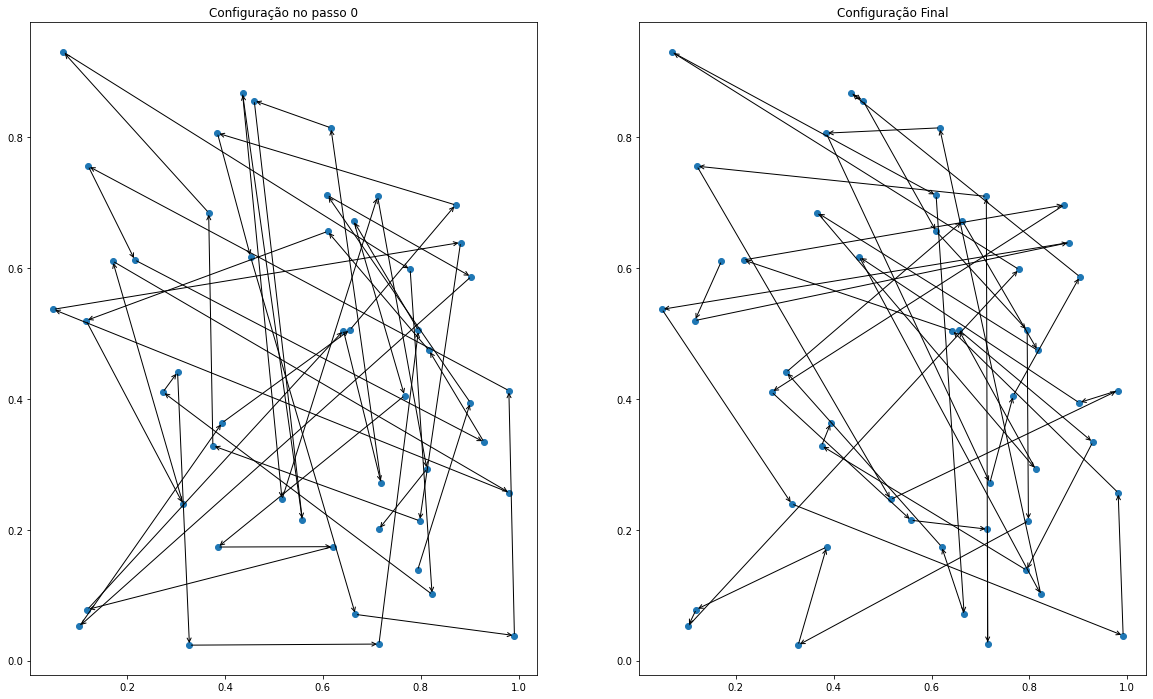

Custo Final: 20.66371086422124
Tempo de processamento: 1.5808680057525635
--------------------------------------------------------------------------
Temperatura final: 0.25


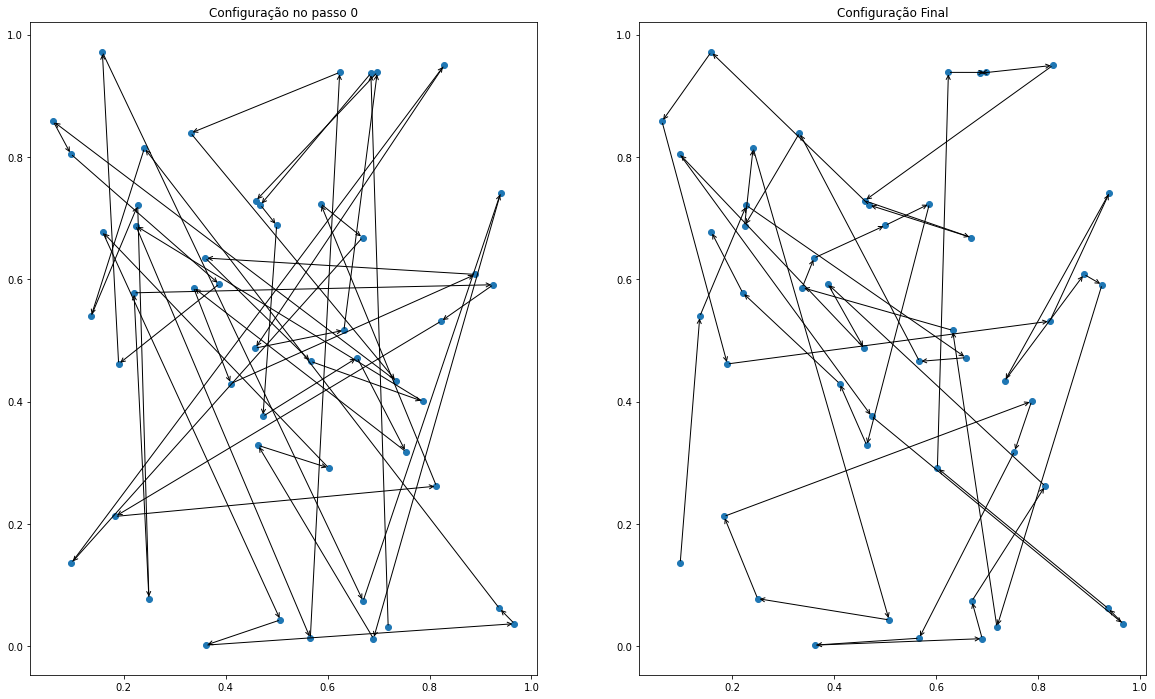

Custo Final: 15.189473429575383
Tempo de processamento: 1.724724292755127
--------------------------------------------------------------------------
Temperatura final: 0.01


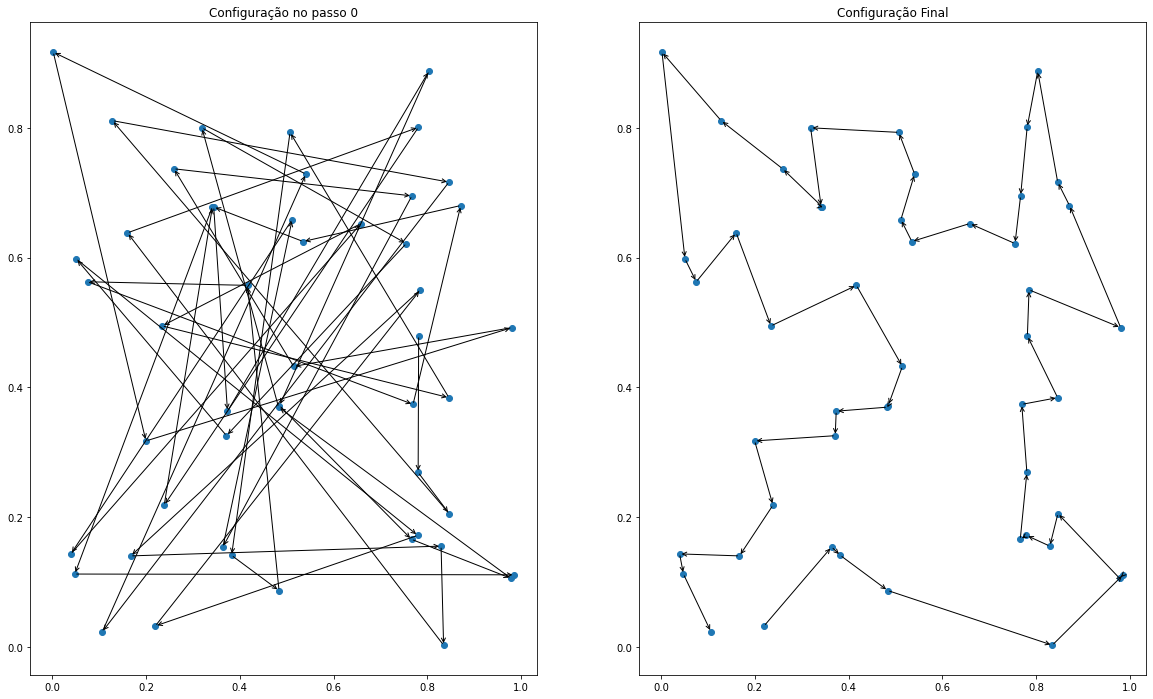

Custo Final: 5.6774197869561585
Tempo de processamento: 2.751551628112793
--------------------------------------------------------------------------
Temperatura final: 0.001


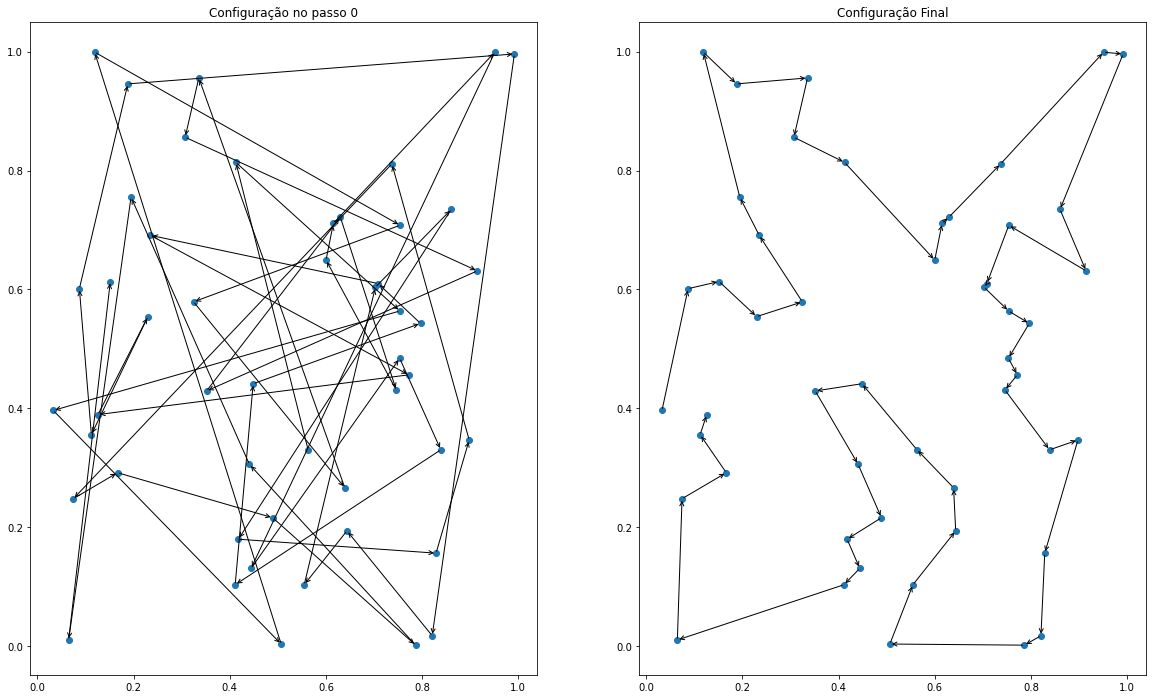

Custo Final: 6.027269929599037
Tempo de processamento: 3.3602023124694824
--------------------------------------------------------------------------


In [99]:
temps = [0.5, 0.25, 0.01, 0.001]
for T_final in temps:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 12))
    start = time.time()
    print("Temperatura final:", T_final)
    cost = simulated_annealing(T_inicial, T_final, dt, N, 2, axes)
    print("Custo Final:", cost)
    print("Tempo de processamento:", (time.time() - start))
    print("--------------------------------------------------------------------------")

A conclusão é, como já imaginado, que quanto menor é a temperatura final do sistema, melhor é a solução encontrada. O tempo de processamento também é afetado, mas de maneira linear.
#### Fator de Decaimento
Vamos avaliar agora a variação em relação ao fator de decaimento.

In [100]:
# parâmetros iniciais
T_inicial = 1
T_final   = 0.001
N = 50

Fator de Decaimento: 0.75


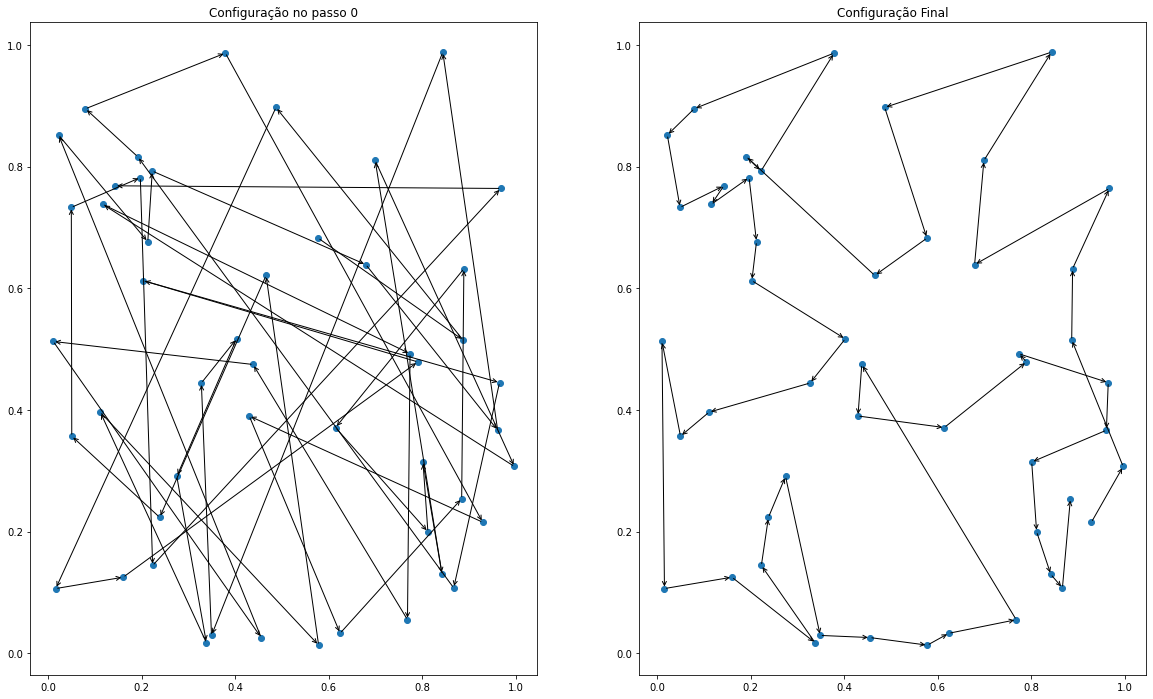

Custo Final: 8.072808972838638
Tempo de processamento: 1.645678997039795
--------------------------------------------------------------------------
Fator de Decaimento: 0.95


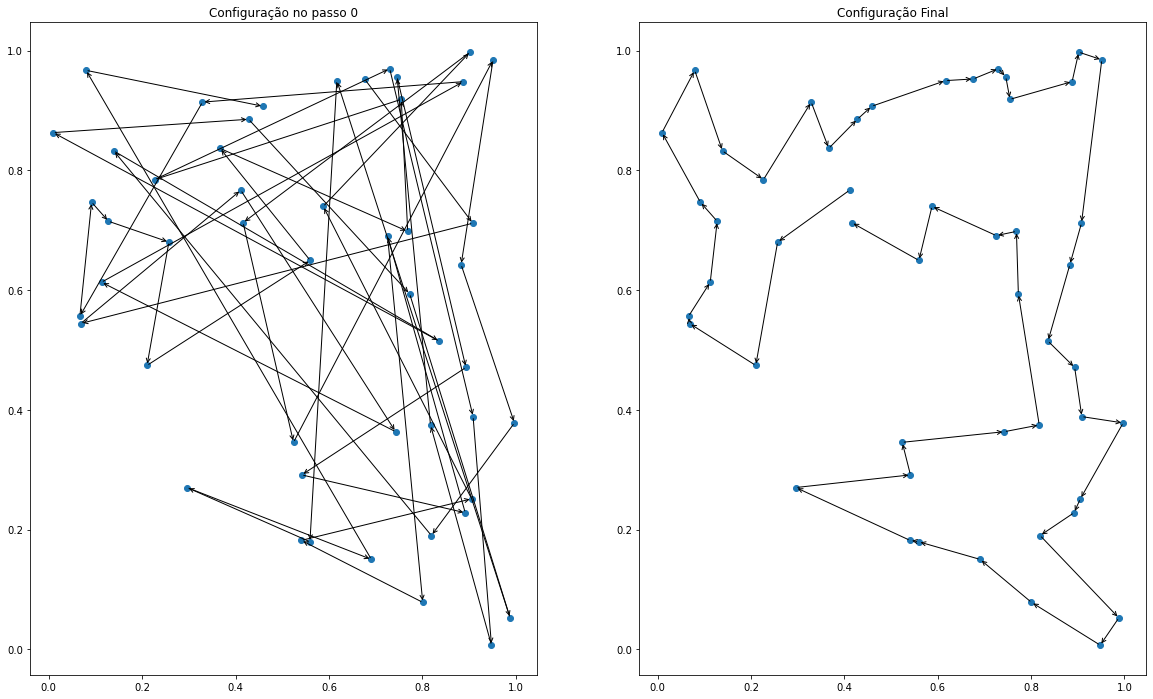

Custo Final: 5.647365452829837
Tempo de processamento: 1.7457754611968994
--------------------------------------------------------------------------
Fator de Decaimento: 0.99


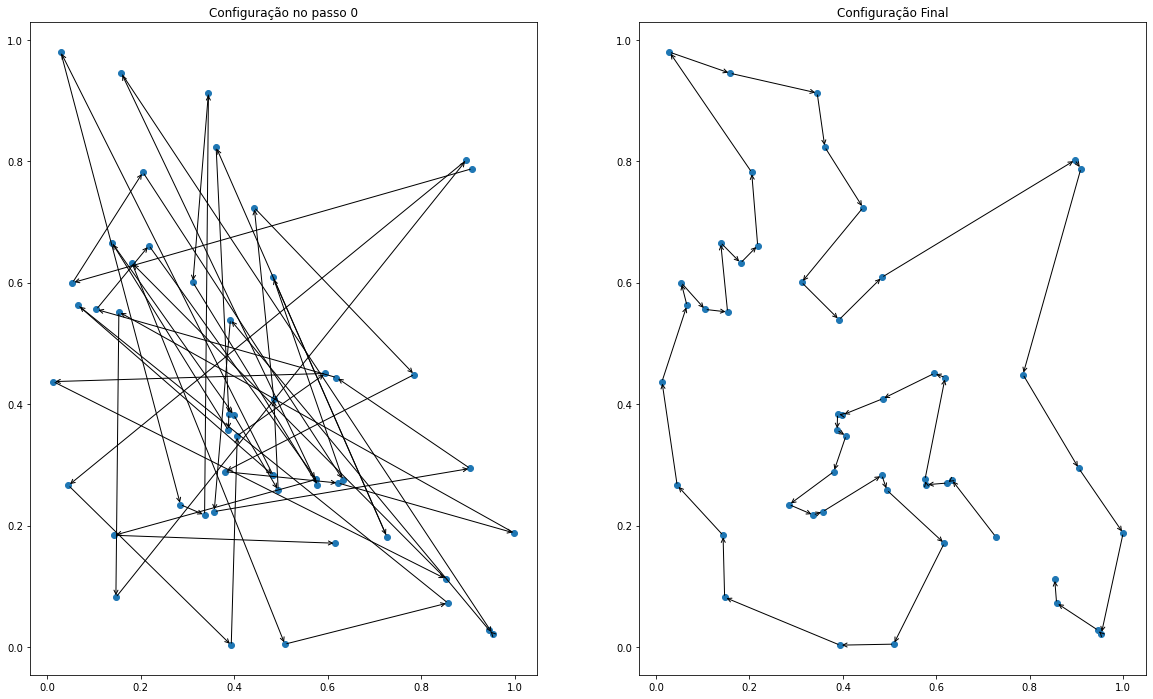

Custo Final: 5.674988956887095
Tempo de processamento: 3.1838223934173584
--------------------------------------------------------------------------
Fator de Decaimento: 0.9999


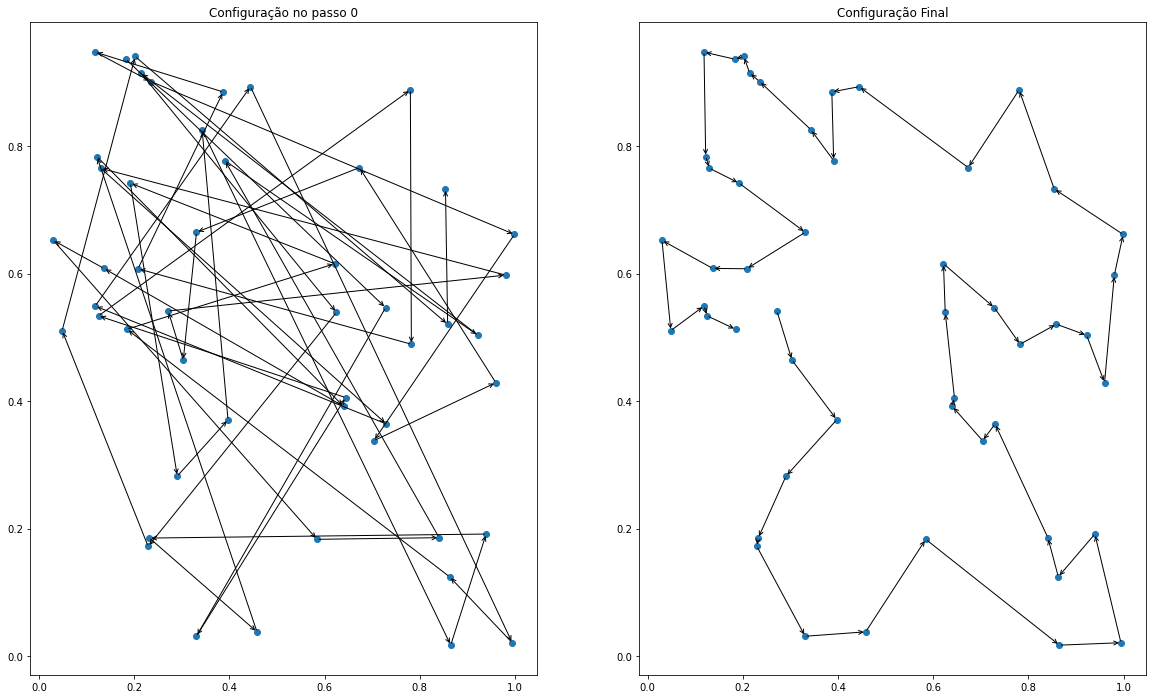

Custo Final: 5.395406355329956
Tempo de processamento: 198.9273965358734
--------------------------------------------------------------------------


In [102]:
dts = [0.75, 0.95, 0.99, 0.9999]
for dt in dts:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 12))
    start = time.time()
    print("Fator de Decaimento:", dt)
    cost = simulated_annealing(T_inicial, T_final, dt, N, 2, axes)
    print("Custo Final:", cost)
    print("Tempo de processamento:", (time.time() - start))
    print("--------------------------------------------------------------------------")

Novamente como o esperado, o fator de decaimento tem grande influência na resposta final. É possível perceber que o tempo de processamento aumenta bastante também. Com um fator de 0.99, encontramos uma aproximação quase tão boa quanto com um fator de 0.9999, em metade do tempo.

#### Caso com N = 200.

Por fim, vamos dar uma olhada em um caso maior um pouco, com N = 200 e ver como nosso algoritmo se sai, tanto em tempo de processamento quanto na otimalidade da solução final.

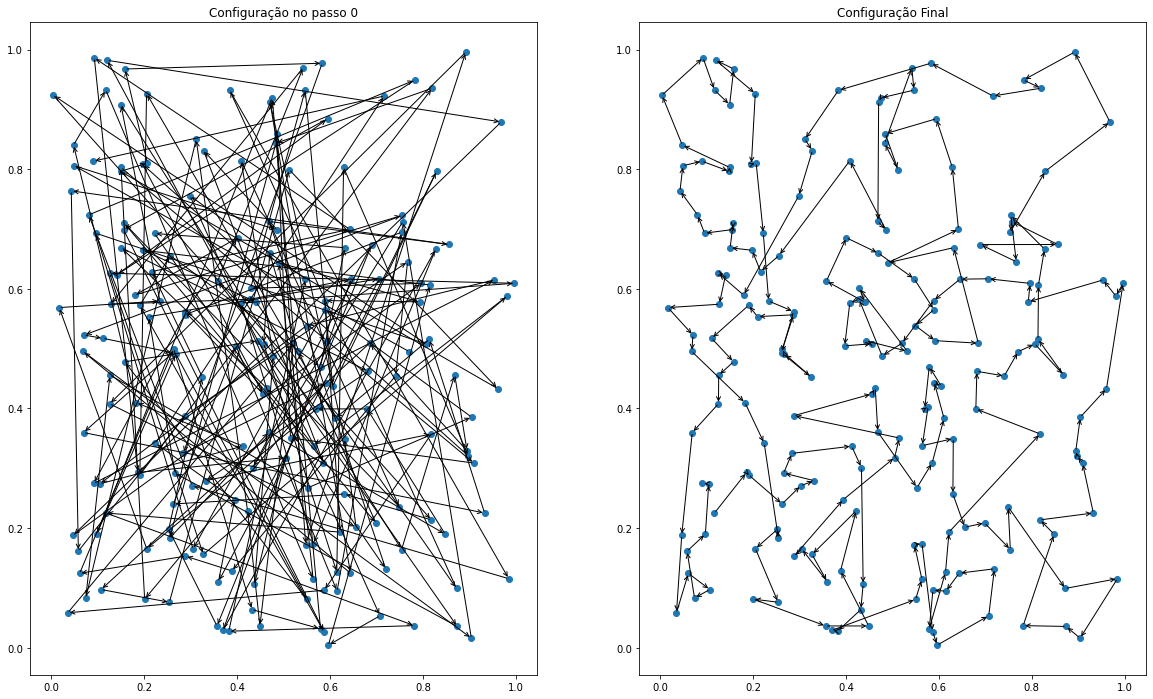

Custo Final: 16.02897000448209
Tempo de processamento: 7.412196636199951


In [106]:
# parâmetros iniciais
T_inicial = 1
T_final   = 0.01
dt = 0.99 # Fator de decaimento
N = 200

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 12))
start = time.time()
cost = simulated_annealing(T_inicial, T_final, dt, N, 2, axes)
print("Custo Final:", cost)
print("Tempo de processamento:", (time.time() - start))

A solução não parece muito boa, apesar do relativamente rápido tempo de processamento. Vamos tentar melhorar os parâmetros.

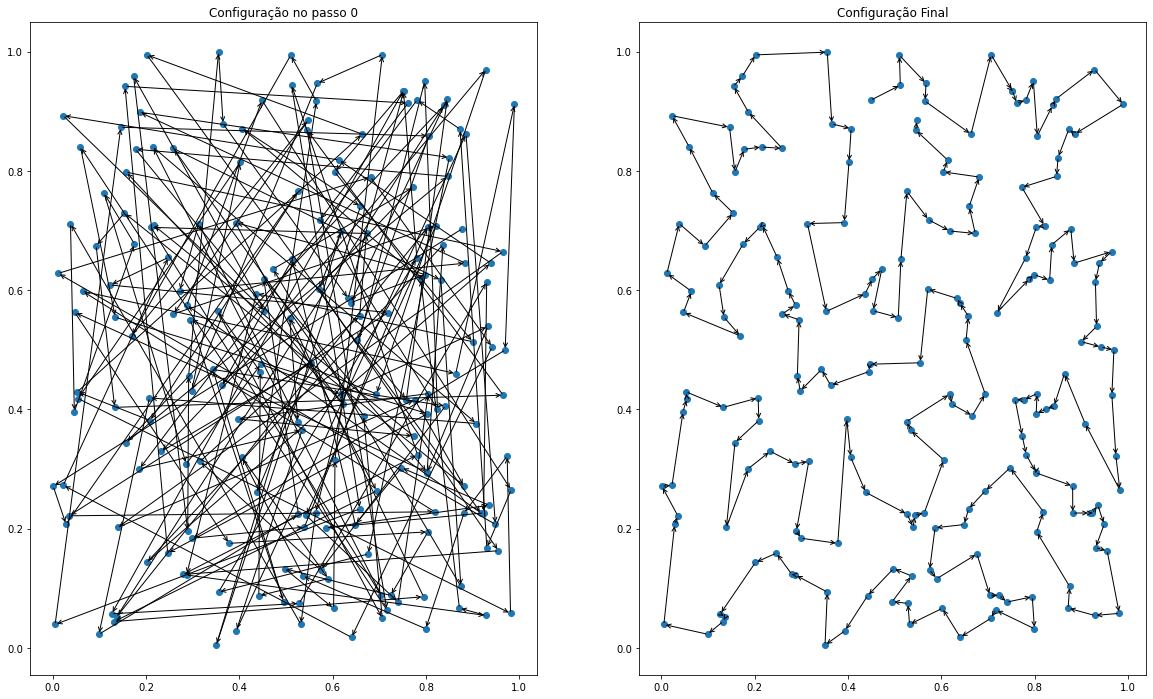

Custo Final: 12.035755436459866
Tempo de processamento: 65.14493584632874


In [108]:
# parâmetros iniciais
T_inicial = 1
T_final   = 0.0001
dt = 0.999 # Fator de decaimento
N = 200

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 12))
start = time.time()
cost = simulated_annealing(T_inicial, T_final, dt, N, 2, axes)
print("Custo Final:", cost)
print("Tempo de processamento:", (time.time() - start))

Apesar do gritante aumento no tempo de processamento, o algoritmo conseguiu encontrar uma boa solução! A gente pode concluir que os parâmetros de temperatura e fator de decaimento devem ser ajustados de acordo com o tamanho da entrada e com o quão boa é necessária que a aproximação seja.